# Name: V Raghav Anand

# Task: Perform data preprocessing of the given dataset and compare the accuracies of all the classification algorithms

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('loan.csv')
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [3]:
dataset.drop(['Loan_ID'],axis=1,inplace=True)
dataset

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
376,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [4]:
for index in dataset.index:
    if dataset.loc[index,'Dependents']=='3+':
        dataset.loc[index,'Dependents']=4

In [5]:
dataset

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
376,Male,Yes,4,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,Male,Yes,4,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             376 non-null    object 
 1   Married            381 non-null    object 
 2   Dependents         373 non-null    object 
 3   Education          381 non-null    object 
 4   Self_Employed      360 non-null    object 
 5   ApplicantIncome    381 non-null    int64  
 6   CoapplicantIncome  381 non-null    float64
 7   LoanAmount         381 non-null    float64
 8   Loan_Amount_Term   370 non-null    float64
 9   Credit_History     351 non-null    float64
 10  Property_Area      381 non-null    object 
 11  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 35.8+ KB


In [7]:
dataset.isnull().any()

Gender                True
Married              False
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [8]:
dataset['Gender'].fillna(dataset['Gender'].mode().iloc[0],inplace=True) # Categorical variable

C:\Users\Raghav\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Dependents', ylabel='Density'>

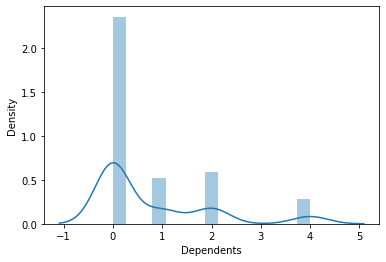

In [9]:
import seaborn as sns 
sns.distplot(dataset['Dependents'].dropna()) 

In [10]:
dataset['Dependents'].fillna(dataset['Dependents'].median(),inplace=True) # Skewed distribution

In [11]:
dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode().iloc[0],inplace=True) # categorical column

C:\Users\Raghav\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

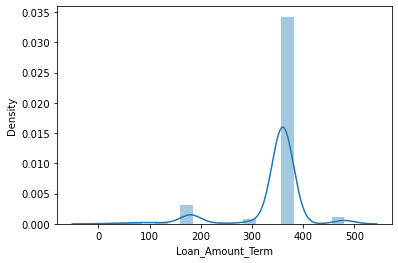

In [12]:
sns.distplot(dataset['Loan_Amount_Term'].dropna()) 

In [13]:
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].median(),inplace=True) # Skewed distribution

C:\Users\Raghav\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

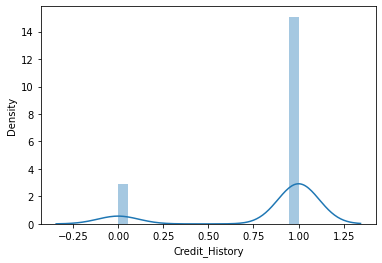

In [14]:
sns.distplot(dataset['Credit_History'].dropna()) 

In [15]:
dataset['Credit_History'].fillna(dataset['Credit_History'].median(),inplace=True) # Skewed distribution

In [16]:
dataset.isnull().any()

Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [17]:
dataset['Dependents']=dataset['Dependents'].astype(np.int64) # Converting dependents column from object to int

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             381 non-null    object 
 1   Married            381 non-null    object 
 2   Dependents         381 non-null    int64  
 3   Education          381 non-null    object 
 4   Self_Employed      381 non-null    object 
 5   ApplicantIncome    381 non-null    int64  
 6   CoapplicantIncome  381 non-null    float64
 7   LoanAmount         381 non-null    float64
 8   Loan_Amount_Term   381 non-null    float64
 9   Credit_History     381 non-null    float64
 10  Property_Area      381 non-null    object 
 11  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 35.8+ KB


In [19]:
df=dataset # Copying dataset into another variable
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
376,Male,Yes,4,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,Male,Yes,4,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct= ColumnTransformer([("on",OneHotEncoder(drop='first'),[0,1,3,4,10,11])],remainder="passthrough")
df=ct.fit_transform(df)
df

array([[  1.,   1.,   0., ..., 128., 360.,   1.],
       [  1.,   1.,   0., ...,  66., 360.,   1.],
       [  1.,   1.,   1., ..., 120., 360.,   1.],
       ...,
       [  0.,   0.,   0., ...,  71., 360.,   1.],
       [  1.,   1.,   0., ...,  40., 180.,   1.],
       [  0.,   0.,   0., ..., 133., 360.,   0.]])

In [21]:
df.shape

(381, 13)

# Visualizing and removing outliers

C:\Users\Raghav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents'>

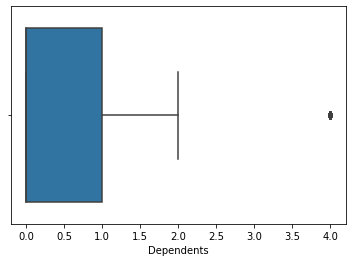

In [22]:
sns.boxplot(dataset['Dependents'])

C:\Users\Raghav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome'>

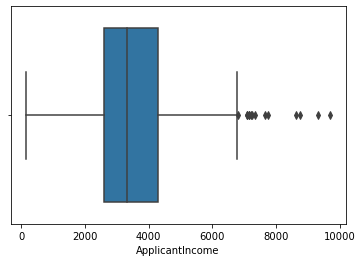

In [23]:
sns.boxplot(dataset['ApplicantIncome'])

C:\Users\Raghav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CoapplicantIncome'>

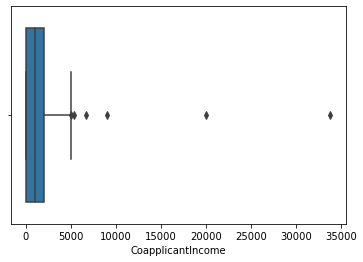

In [24]:
sns.boxplot(dataset['CoapplicantIncome'])

C:\Users\Raghav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanAmount'>

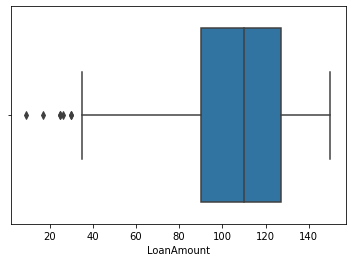

In [25]:
sns.boxplot(dataset['LoanAmount'])

C:\Users\Raghav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Amount_Term'>

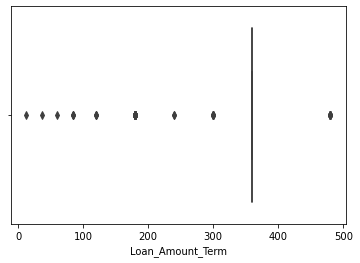

In [26]:
sns.boxplot(dataset['Loan_Amount_Term'])

C:\Users\Raghav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_History'>

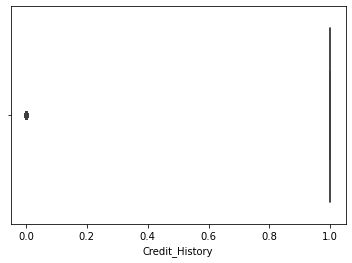

In [27]:
sns.boxplot(dataset['Credit_History'])

In [28]:
from scipy import stats

In [29]:
z=np.abs(stats.zscore(df))
z

array([[0.53587514, 0.81917802, 0.60869007, ..., 0.81257519, 0.27514748,
        0.41943525],
       [0.53587514, 0.81917802, 0.60869007, ..., 1.37659578, 0.27514748,
        0.41943525],
       [0.53587514, 0.81917802, 1.64287222, ..., 0.53010151, 0.27514748,
        0.41943525],
       ...,
       [1.86610636, 1.22073588, 0.60869007, ..., 1.20004974, 0.27514748,
        0.41943525],
       [0.53587514, 0.81917802, 0.60869007, ..., 2.29463522, 2.39005229,
        0.41943525],
       [1.86610636, 1.22073588, 0.60869007, ..., 0.98912123, 0.27514748,
        2.38415824]])

In [30]:
threshold=3
np.where(z>threshold)

(array([  1,   8,   8,  22,  31,  49,  49,  51,  55,  56,  65,  79,  84,
         84,  87,  99, 105, 113, 129, 140, 145, 150, 152, 153, 158, 164,
        179, 199, 199, 213, 220, 228, 235, 240, 256, 261, 275, 275, 280,
        282, 290, 303, 313, 315, 316, 331, 345, 353, 357, 360, 364, 371,
        380], dtype=int64),
 array([ 3, 10, 11,  3,  3,  3, 11,  3,  3,  3, 11,  9,  3, 11,  3,  8,  3,
         3,  3,  3,  3,  3,  3,  8,  3,  3,  3,  3, 11,  3,  3,  3,  8,  3,
         9,  3,  3,  8,  3,  3,  3,  3, 11, 11,  3,  3, 11,  3, 10, 11,  9,
         3,  3], dtype=int64))

In [31]:
clean_df= pd.DataFrame(df)
clean_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4583.0,1508.0,128.0,360.0,1.0
1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,3000.0,0.0,66.0,360.0,1.0
2,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,2583.0,2358.0,120.0,360.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,6000.0,0.0,141.0,360.0,1.0
4,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,2333.0,1516.0,95.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,1.0,1.0,0.0,0.0,0.0,1.0,1.0,4.0,5703.0,0.0,128.0,360.0,1.0
377,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3232.0,1950.0,108.0,360.0,1.0
378,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2900.0,0.0,71.0,360.0,1.0
379,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,4106.0,0.0,40.0,180.0,1.0


In [32]:
df_no_outliers=clean_df[(z<=3).all(axis=1)]
df_no_outliers

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4583.0,1508.0,128.0,360.0,1.0
2,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,2583.0,2358.0,120.0,360.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,6000.0,0.0,141.0,360.0,1.0
4,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,2333.0,1516.0,95.0,360.0,1.0
5,1.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,3200.0,700.0,70.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2987.0,0.0,88.0,360.0,0.0
376,1.0,1.0,0.0,0.0,0.0,1.0,1.0,4.0,5703.0,0.0,128.0,360.0,1.0
377,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3232.0,1950.0,108.0,360.0,1.0
378,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2900.0,0.0,71.0,360.0,1.0


# Separating dependent and independent variables

In [33]:
df_no_outliers

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4583.0,1508.0,128.0,360.0,1.0
2,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,2583.0,2358.0,120.0,360.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,6000.0,0.0,141.0,360.0,1.0
4,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,2333.0,1516.0,95.0,360.0,1.0
5,1.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,3200.0,700.0,70.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2987.0,0.0,88.0,360.0,0.0
376,1.0,1.0,0.0,0.0,0.0,1.0,1.0,4.0,5703.0,0.0,128.0,360.0,1.0
377,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3232.0,1950.0,108.0,360.0,1.0
378,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2900.0,0.0,71.0,360.0,1.0


In [34]:
df_no_outliers.columns=['a','b','c','d','e','f','g','h','i','j','k','l','m'] # column 'g' is the dependent column
df_no_outliers

,a,b,c,d,e,f,g,h,i,j,k,l,m
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4583.0,1508.0,128.0,360.0,1.0
2,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,2583.0,2358.0,120.0,360.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,6000.0,0.0,141.0,360.0,1.0
4,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,2333.0,1516.0,95.0,360.0,1.0
5,1.0,1.0,0.0,0.0,0.0,1.0,1.0,2.0,3200.0,700.0,70.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2987.0,0.0,88.0,360.0,0.0
376,1.0,1.0,0.0,0.0,0.0,1.0,1.0,4.0,5703.0,0.0,128.0,360.0,1.0
377,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3232.0,1950.0,108.0,360.0,1.0
378,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2900.0,0.0,71.0,360.0,1.0


In [35]:
mid=df_no_outliers['g'] # copy column 'g'
df_no_outliers.drop(labels=['g'],axis=1,inplace=True)

C:\Users\Raghav\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [36]:
df_no_outliers.insert(12,'g',mid) # drop the column and insert it at last again so that the dependent column can be easily extracted
df_no_outliers

,a,b,c,d,e,f,h,i,j,k,l,m,g
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4583.0,1508.0,128.0,360.0,1.0,0.0
2,1.0,1.0,1.0,0.0,0.0,1.0,0.0,2583.0,2358.0,120.0,360.0,1.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.0,360.0,1.0,1.0
4,1.0,1.0,1.0,0.0,0.0,1.0,0.0,2333.0,1516.0,95.0,360.0,1.0,1.0
5,1.0,1.0,0.0,0.0,0.0,1.0,2.0,3200.0,700.0,70.0,360.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2987.0,0.0,88.0,360.0,0.0,0.0
376,1.0,1.0,0.0,0.0,0.0,1.0,4.0,5703.0,0.0,128.0,360.0,1.0,1.0
377,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3232.0,1950.0,108.0,360.0,1.0,1.0
378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2900.0,0.0,71.0,360.0,1.0,1.0


In [37]:
x=df_no_outliers.iloc[:,0:12].values # independent columns
x

array([[  1.,   1.,   0., ..., 128., 360.,   1.],
       [  1.,   1.,   1., ..., 120., 360.,   1.],
       [  1.,   0.,   0., ..., 141., 360.,   1.],
       ...,
       [  1.,   1.,   0., ..., 108., 360.,   1.],
       [  0.,   0.,   0., ...,  71., 360.,   1.],
       [  1.,   1.,   0., ...,  40., 180.,   1.]])

In [38]:
y=df_no_outliers.iloc[:,-1].values # dependent column
y

array([0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 0.

In [39]:
# Normalization using standard scaler, good practice for regression algorithms and distance related algorithms
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.53452248,  0.81547532, -0.60858062, ...,  0.81642326,
         0.22030135,  0.43017831],
       [ 0.53452248,  0.81547532,  1.64316767, ...,  0.52573206,
         0.22030135,  0.43017831],
       [ 0.53452248, -1.22627868, -0.60858062, ...,  1.28879645,
         0.22030135,  0.43017831],
       ...,
       [ 0.53452248,  0.81547532, -0.60858062, ...,  0.08969526,
         0.22030135,  0.43017831],
       [-1.87082869, -1.22627868, -0.60858062, ..., -1.25475154,
         0.22030135,  0.43017831],
       [ 0.53452248,  0.81547532, -0.60858062, ..., -2.38117994,
        -3.01618463,  0.43017831]])

# Splitting train and test data

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0) # 20% test size

In [41]:
x_train.shape

(266, 12)

In [42]:
x_test.shape

(67, 12)

In [43]:
y_train.shape

(266,)

In [44]:
y_test.shape

(67,)

# Classification algorithms

# Logistic regression( Binary classification)

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [47]:
y_pred=lr.predict(x_test)
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [48]:
from sklearn.metrics import accuracy_score
a1=accuracy_score(y_test,y_pred)
a1

0.8507462686567164

 Logistic regression (Binary classification) gives an accuracy of 85.07%

# K-Nearest Neighbours

In [49]:
from sklearn.model_selection import GridSearchCV 
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn_grid=GridSearchCV(estimator=KNeighborsClassifier(),param_grid={'n_neighbors':np.arange(1,20)},cv=5)

In [51]:
knn_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [52]:
knn_grid.best_params_

{'n_neighbors': 12}

In [53]:
knn=KNeighborsClassifier(n_neighbors=12)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [54]:
y_pred=knn.predict(x_test)
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [55]:
from sklearn.metrics import accuracy_score
a2=accuracy_score(y_test,y_pred)
a2

0.835820895522388

K-Nearest Neighbours algorithm gives an accuracy of 83.58%

In [56]:
x=df_no_outliers.iloc[:,0:12].values 
y=df_no_outliers.iloc[:,-1].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Naive Bayes 

In [57]:
from sklearn.pipeline import Pipeline # To perform multiple tasks at the same time
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB 

In [58]:
pipe=Pipeline([("mn",MinMaxScaler()),("naive",GaussianNB())])

In [59]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('mn', MinMaxScaler()), ('naive', GaussianNB())])

In [60]:
y_pred=pipe.predict(x_test)
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [61]:
y_test

array([1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1.])

In [62]:
from sklearn.metrics import accuracy_score
a3=accuracy_score(y_test,y_pred)
a3

0.8507462686567164

Naive Bayes gives an accuracy of 85.07%

In [63]:
x=df_no_outliers.iloc[:,0:12].values 
y=df_no_outliers.iloc[:,-1].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Random Forest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rf_grid=GridSearchCV(estimator=RandomForestClassifier(),param_grid={'n_estimators':np.arange(1,50),'criterion':['gini','entropy'],'max_depth':np.arange(2,10)},cv=5)

In [67]:
rf_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [68]:
rf_grid.best_params_

{'criterion': 'gini', 'max_depth': 7, 'n_estimators': 42}

In [69]:
rf=RandomForestClassifier(criterion='entropy',n_estimators=42,max_depth=7)

In [70]:
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=42)

In [71]:
y_pred=rf.predict(x_test)
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [72]:
from sklearn.metrics import accuracy_score
a4=accuracy_score(y_test,y_pred)
a4

0.8507462686567164

Random Forest Classifier gives an accuracy of 85.07%

# Decision Tree Classifier

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
dt_grid=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid={'criterion':['gini','entropy'],'max_depth':np.arange(2,8)},cv=5)

In [75]:
dt_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7])})

In [76]:
dt_grid.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [77]:
dt=DecisionTreeClassifier(max_depth=2)

In [78]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [79]:
y_pred=dt.predict(x_test)
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [80]:
from sklearn.metrics import accuracy_score
a5=accuracy_score(y_test,y_pred)
a5

0.8507462686567164

Decision tree gives an accuracy of 85.07%

# Accuracy Bar-plot

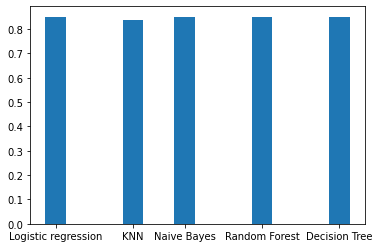

In [81]:
height = [a1, a2, a3, a4, a5]
bars = ["Logistic regression","KNN","Naive Bayes","Random Forest","Decision Tree"]
x_pos = [0,3,5,8,11]
plt.bar(x_pos, height)
plt.xticks(x_pos, bars)
plt.show()

In [82]:
print("Accuracies:",a1,a2,a3,a4,a5)

Accuracies: 0.8507462686567164 0.835820895522388 0.8507462686567164 0.8507462686567164 0.8507462686567164
